In [293]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from sklearn import set_config 
from sklearn import tree
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import os
import pandas as pd

In [260]:
os.getcwd()

'/Users/sohantha/Documents/Sohan Thakur/Personal/Bellevue University/DSC680/Week_5_8/liberty-mutual-group-property-inspection-prediction'

In [261]:
!ls

sample_submission.csv
sample_submission.csv.zip
test.csv
test.csv.zip
train.csv
train.csv.zip
tree.JPEG
tree.dot
week_5_8_house_hazardous_score_prediction.ipynb


In [262]:
df_train_house = pd.read_csv(os.getcwd()+"/train.csv")

In [263]:
df_train_house.head()

,Id,Hazard,T1_V1,T1_V2,T1_V3,T1_V4,T1_V5,T1_V6,T1_V7,T1_V8,...,T2_V6,T2_V7,T2_V8,T2_V9,T2_V10,T2_V11,T2_V12,T2_V13,T2_V14,T2_V15
0,1,1,15,3,2,N,B,N,B,B,...,2,37,1,11,6,Y,N,E,2,2
1,2,4,16,14,5,H,B,N,B,B,...,2,22,1,18,5,Y,Y,E,2,1
2,3,1,10,10,5,N,K,N,B,B,...,6,37,2,14,6,Y,Y,E,6,1
3,4,1,18,18,5,N,K,N,B,B,...,2,25,1,1,6,Y,N,C,2,6
4,5,1,13,19,5,N,H,N,B,B,...,1,22,1,2,7,N,N,E,1,1


In [264]:
df_train_house.dtypes

Id         int64
Hazard     int64
T1_V1      int64
T1_V2      int64
T1_V3      int64
T1_V4     object
T1_V5     object
T1_V6     object
T1_V7     object
T1_V8     object
T1_V9     object
T1_V10     int64
T1_V11    object
T1_V12    object
T1_V13     int64
T1_V14     int64
T1_V15    object
T1_V16    object
T1_V17    object
T2_V1      int64
T2_V2      int64
T2_V3     object
T2_V4      int64
T2_V5     object
T2_V6      int64
T2_V7      int64
T2_V8      int64
T2_V9      int64
T2_V10     int64
T2_V11    object
T2_V12    object
T2_V13    object
T2_V14     int64
T2_V15     int64
dtype: object

In [265]:
#Converting objects to categorical by encoding
df_train_house.Id.dtypes
for col in df_train_house.columns:
    if df_train_house[col].dtypes == 'object':
        df_train_house[col] = pd.Categorical(df_train_house[col]).codes

In [266]:
df_train_house

,Id,Hazard,T1_V1,T1_V2,T1_V3,T1_V4,T1_V5,T1_V6,T1_V7,T1_V8,...,T2_V6,T2_V7,T2_V8,T2_V9,T2_V10,T2_V11,T2_V12,T2_V13,T2_V14,T2_V15
0,1,1,15,3,2,5,1,0,1,1,...,2,37,1,11,6,1,0,4,2,2
1,2,4,16,14,5,4,1,0,1,1,...,2,22,1,18,5,1,1,4,2,1
2,3,1,10,10,5,5,8,0,1,1,...,6,37,2,14,6,1,1,4,6,1
3,4,1,18,18,5,5,8,0,1,1,...,2,25,1,1,6,1,0,2,2,6
4,5,1,13,19,5,5,5,0,1,1,...,1,22,1,2,7,0,0,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50994,101992,7,12,24,1,5,5,1,1,1,...,4,25,2,9,7,1,1,4,4,1
50995,101993,4,12,17,4,5,8,0,1,1,...,2,37,1,4,7,0,0,0,5,2
50996,101994,3,18,7,5,7,1,1,1,1,...,2,28,1,1,2,0,0,4,1,1
50997,101998,14,18,17,5,0,0,0,1,3,...,1,40,1,7,4,1,0,2,2,6


In [267]:
df_train_house_x = df_train_house[['T1_V1', 'T1_V2', 'T1_V3', 'T1_V4', 'T1_V5', 'T1_V6',
       'T1_V7', 'T1_V8', 'T1_V9', 'T1_V10', 'T1_V11', 'T1_V12', 'T1_V13',
       'T1_V14', 'T1_V15', 'T1_V16', 'T1_V17', 'T2_V1', 'T2_V2', 'T2_V3',
       'T2_V4', 'T2_V5', 'T2_V6', 'T2_V7', 'T2_V8', 'T2_V9', 'T2_V10',
       'T2_V11', 'T2_V12', 'T2_V13', 'T2_V14', 'T2_V15']]

In [268]:
df_train_house_y = df_train_house[['Hazard']]

In [269]:
#Spliting  dataset into 70% training and 30% test data
xtrain, xtest, ytrain, ytest=train_test_split(df_train_house_x, df_train_house_y, test_size=0.30)


#### Decision Tree regressor

In [270]:
set_config(print_changed_only=False) 

dtr = DecisionTreeRegressor(random_state = 42)


In [271]:
print(dtr)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')


In [272]:
dtr.fit(xtrain, ytrain)

score = dtr.score(xtrain, ytrain)
print("R-squared:", score) 
 

R-squared: 1.0


In [307]:
ypred = dtr.predict(xtest)

mse = mean_squared_error(ytest, ypred)
print("MSE: ", mse)
print("RMSE: ", np.sqrt(mse) )

MSE:  31.35549019607843
RMSE:  5.59959732445811


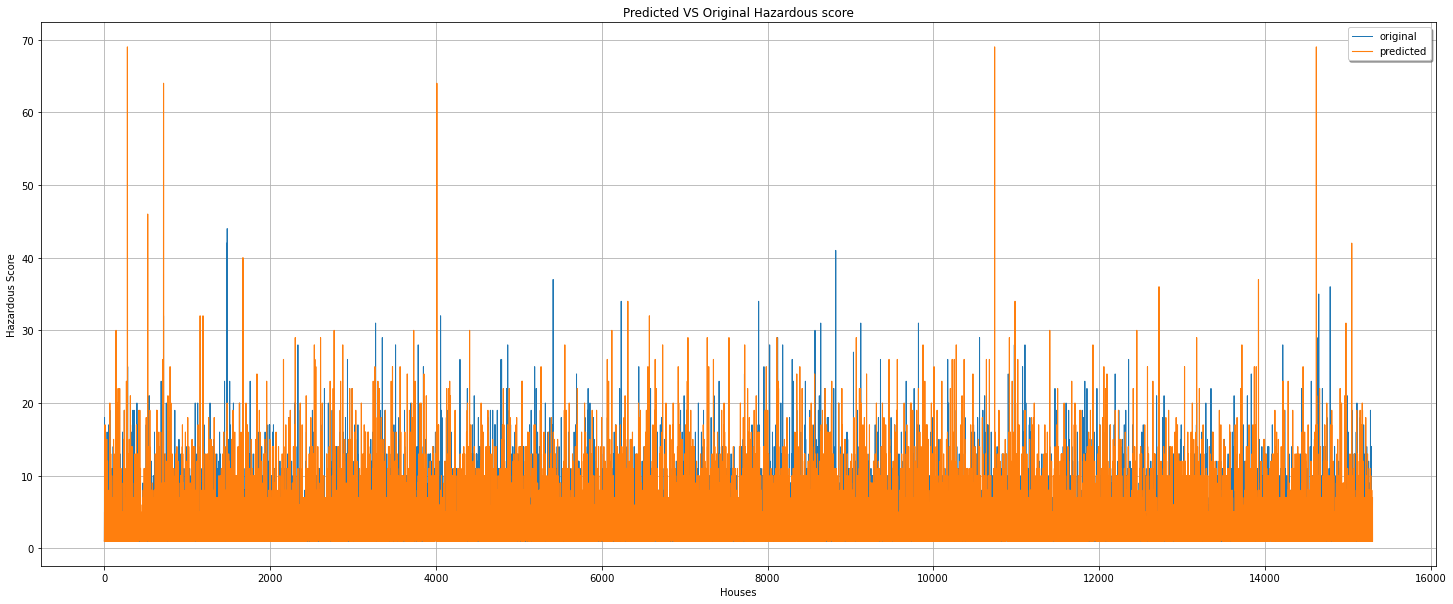

In [274]:
x_ax = range(len(ytest))

plt.rc('figure', figsize=[25,10])

plt.plot(x_ax, ytest, linewidth=1, label="original")
plt.plot(x_ax, ypred, linewidth=1.1, label="predicted")
plt.title("Predicted VS Original Hazardous score")
plt.xlabel('Houses')
plt.ylabel('Hazardous Score')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [276]:
pd_ypred = pd.DataFrame(ypred,columns=['Hazard'])

In [277]:
pd_ypred.count()

Hazard    15300
dtype: int64

In [278]:
ytest.count()

Hazard    15300
dtype: int64

In [279]:
pd_comb = ytest.join(pd_ypred, lsuffix='_original', rsuffix='_predicted')

In [105]:
pd_grp = pd_ypred.groupby(by=['Hazard']).head()

#### Random forest regressor

In [154]:
#created  Random forest regressor with basic hyperparpameters 
rfr = RandomForestRegressor(n_estimators = 200, max_depth = 20, max_features = 'sqrt' ,random_state = 0)

#Performing search for most accuracte hyper parameter
n_estimators = [100,200,500,1000]
max_features = ['sqrt','auto','log2']
max_depths = [20,50,70]

for n_estimator in n_estimators:
    for max_feature in max_features:
        for max_depth in max_depths:
            rfr = RandomForestRegressor(n_estimators = n_estimator, max_depth = max_depth, max_features = max_feature ,random_state = 0)
            rfr.fit(xtrain, ytrain)
            score = rfr.score(xtrain, ytrain)
            print("For number of estimator : {}, max feature :{} and max depth:{},R-squared error is {}:".format(n_estimator,max_feature,max_depth,score) )
            

<ipython-input-154-c344c6edfd02>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(xtrain, ytrain)


For number of estimator : 100, max feature :sqrt and max depth:20,R-squared error is 0.7634474550492427:


<ipython-input-154-c344c6edfd02>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(xtrain, ytrain)


For number of estimator : 100, max feature :sqrt and max depth:50,R-squared error is 0.8714158153423186:


<ipython-input-154-c344c6edfd02>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(xtrain, ytrain)


For number of estimator : 100, max feature :sqrt and max depth:70,R-squared error is 0.8714158153423186:


<ipython-input-154-c344c6edfd02>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(xtrain, ytrain)


For number of estimator : 100, max feature :auto and max depth:20,R-squared error is 0.790339510221655:


<ipython-input-154-c344c6edfd02>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(xtrain, ytrain)


For number of estimator : 100, max feature :auto and max depth:50,R-squared error is 0.8684922288865851:


<ipython-input-154-c344c6edfd02>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(xtrain, ytrain)


For number of estimator : 100, max feature :auto and max depth:70,R-squared error is 0.8684922288865851:


<ipython-input-154-c344c6edfd02>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(xtrain, ytrain)


For number of estimator : 100, max feature :log2 and max depth:20,R-squared error is 0.7634474550492427:


<ipython-input-154-c344c6edfd02>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(xtrain, ytrain)


For number of estimator : 100, max feature :log2 and max depth:50,R-squared error is 0.8714158153423186:


<ipython-input-154-c344c6edfd02>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(xtrain, ytrain)


For number of estimator : 100, max feature :log2 and max depth:70,R-squared error is 0.8714158153423186:


<ipython-input-154-c344c6edfd02>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(xtrain, ytrain)


For number of estimator : 200, max feature :sqrt and max depth:20,R-squared error is 0.7651310963142911:


<ipython-input-154-c344c6edfd02>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(xtrain, ytrain)


For number of estimator : 200, max feature :sqrt and max depth:50,R-squared error is 0.8746016724020319:


<ipython-input-154-c344c6edfd02>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(xtrain, ytrain)


For number of estimator : 200, max feature :sqrt and max depth:70,R-squared error is 0.8746016724020319:


<ipython-input-154-c344c6edfd02>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(xtrain, ytrain)


For number of estimator : 200, max feature :auto and max depth:20,R-squared error is 0.7955283787447702:


<ipython-input-154-c344c6edfd02>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(xtrain, ytrain)


For number of estimator : 200, max feature :auto and max depth:50,R-squared error is 0.8720794988242503:


<ipython-input-154-c344c6edfd02>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(xtrain, ytrain)


For number of estimator : 200, max feature :auto and max depth:70,R-squared error is 0.8720794988242503:


<ipython-input-154-c344c6edfd02>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(xtrain, ytrain)


For number of estimator : 200, max feature :log2 and max depth:20,R-squared error is 0.7651310963142911:


<ipython-input-154-c344c6edfd02>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(xtrain, ytrain)


For number of estimator : 200, max feature :log2 and max depth:50,R-squared error is 0.8746016724020319:


<ipython-input-154-c344c6edfd02>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(xtrain, ytrain)


For number of estimator : 200, max feature :log2 and max depth:70,R-squared error is 0.8746016724020319:


<ipython-input-154-c344c6edfd02>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(xtrain, ytrain)


For number of estimator : 500, max feature :sqrt and max depth:20,R-squared error is 0.7663495299557133:


<ipython-input-154-c344c6edfd02>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(xtrain, ytrain)


For number of estimator : 500, max feature :sqrt and max depth:50,R-squared error is 0.8760604387174319:


<ipython-input-154-c344c6edfd02>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(xtrain, ytrain)


For number of estimator : 500, max feature :sqrt and max depth:70,R-squared error is 0.8760604387174319:


<ipython-input-154-c344c6edfd02>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(xtrain, ytrain)


For number of estimator : 500, max feature :auto and max depth:20,R-squared error is 0.797240730917659:


<ipython-input-154-c344c6edfd02>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(xtrain, ytrain)


For number of estimator : 500, max feature :auto and max depth:50,R-squared error is 0.8733258580375668:


<ipython-input-154-c344c6edfd02>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(xtrain, ytrain)


For number of estimator : 500, max feature :auto and max depth:70,R-squared error is 0.8733258580375668:


<ipython-input-154-c344c6edfd02>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(xtrain, ytrain)


For number of estimator : 500, max feature :log2 and max depth:20,R-squared error is 0.7663495299557133:


<ipython-input-154-c344c6edfd02>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(xtrain, ytrain)


For number of estimator : 500, max feature :log2 and max depth:50,R-squared error is 0.8760604387174319:


<ipython-input-154-c344c6edfd02>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(xtrain, ytrain)


For number of estimator : 500, max feature :log2 and max depth:70,R-squared error is 0.8760604387174319:


<ipython-input-154-c344c6edfd02>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(xtrain, ytrain)


For number of estimator : 1000, max feature :sqrt and max depth:20,R-squared error is 0.7666451743059728:


<ipython-input-154-c344c6edfd02>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(xtrain, ytrain)


For number of estimator : 1000, max feature :sqrt and max depth:50,R-squared error is 0.8769486711615125:


<ipython-input-154-c344c6edfd02>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(xtrain, ytrain)


For number of estimator : 1000, max feature :sqrt and max depth:70,R-squared error is 0.8769486711615125:


<ipython-input-154-c344c6edfd02>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(xtrain, ytrain)


For number of estimator : 1000, max feature :auto and max depth:20,R-squared error is 0.7986025920836249:


<ipython-input-154-c344c6edfd02>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(xtrain, ytrain)


For number of estimator : 1000, max feature :auto and max depth:50,R-squared error is 0.874130606882414:


<ipython-input-154-c344c6edfd02>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(xtrain, ytrain)


For number of estimator : 1000, max feature :auto and max depth:70,R-squared error is 0.874130606882414:


<ipython-input-154-c344c6edfd02>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(xtrain, ytrain)


For number of estimator : 1000, max feature :log2 and max depth:20,R-squared error is 0.7666451743059728:


<ipython-input-154-c344c6edfd02>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(xtrain, ytrain)


For number of estimator : 1000, max feature :log2 and max depth:50,R-squared error is 0.8769486711615125:


<ipython-input-154-c344c6edfd02>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(xtrain, ytrain)


For number of estimator : 1000, max feature :log2 and max depth:70,R-squared error is 0.8769486711615125:


In [155]:
#For number of estimator : 1000, max feature :sqrt and max depth:50,R-squared error is 0.8769486711615125:
rfr = RandomForestRegressor(n_estimators = 1000, max_depth = 50, max_features = 'sqrt' ,random_state = 0)


In [156]:
rfr.fit(xtrain, ytrain)

score = rfr.score(xtrain, ytrain)
print("R-squared:", score) 
 

<ipython-input-156-900a379ae718>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(xtrain, ytrain)


R-squared: 0.8769486711615125


In [308]:
ypred = rfr.predict(xtest)

mse = mean_squared_error(ytest, ypred)
print("MSE: ", mse)
print("RMSE: ", np.sqrt(mse)) 

MSE:  5.5780710152941175
RMSE:  2.3617940247392695


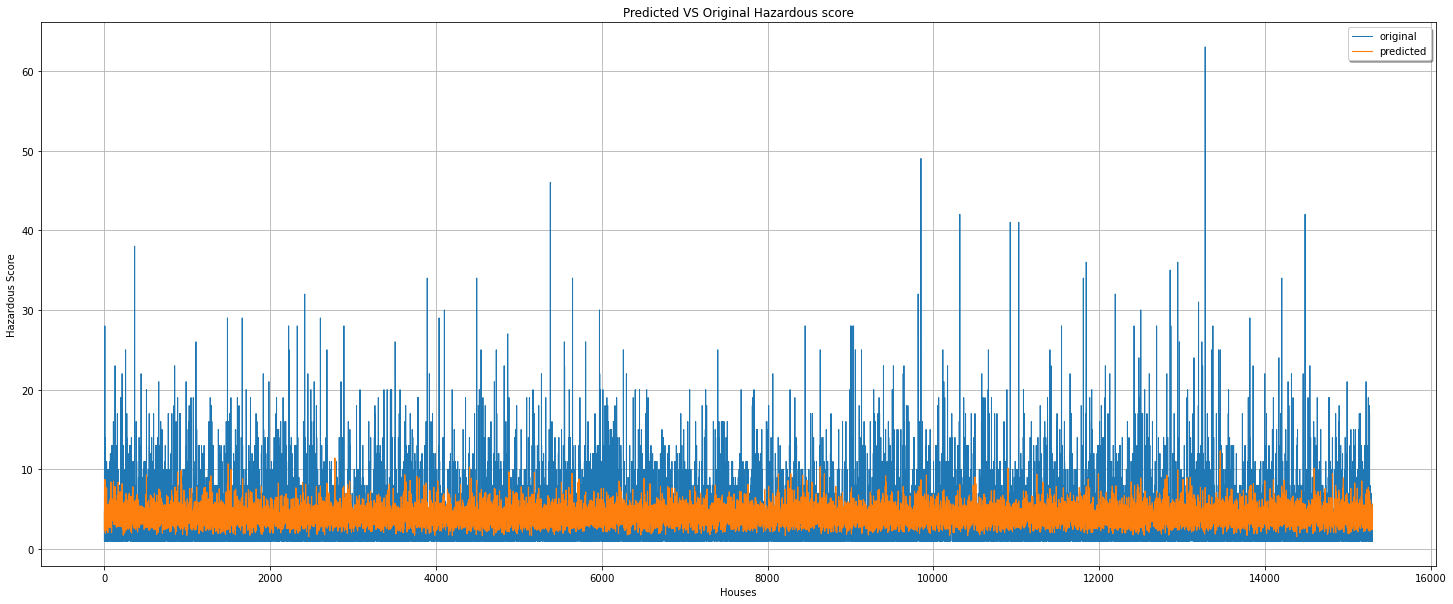

In [159]:
x_ax = range(len(ytest))

plt.rc('figure', figsize=[25,10])

plt.plot(x_ax, ytest, linewidth=1, label="original")
plt.plot(x_ax, ypred, linewidth=1.1, label="predicted")
plt.title("Predicted VS Original Hazardous score")
plt.xlabel('Houses')
plt.ylabel('Hazardous Score')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#### SVM

In [166]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import numpy as np

In [162]:
regressor = SVR(kernel = 'rbf')
regressor.fit(xtrain, ytrain)


/Users/sohantha/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [163]:
y_pred = regressor.predict(xtest)

In [169]:
# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(ytest, y_pred)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  4.188


In [184]:
ytest.count()

Hazard    15300
dtype: int64

In [177]:
pd_ypred = pd.DataFrame(y_pred,columns=['Hazard'])
pd_comb = ytest.join(pd_ypred, lsuffix='_original', rsuffix='_predicted')

#### XGBoost

In [291]:
xg_boost_model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.00001, max_delta_step=0, max_depth=50,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=30, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
xg_boost_model.fit(xtrain, ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1e-05, max_delta_step=0, max_depth=50,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=30, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [309]:
xg_boost_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1e-05, max_delta_step=0, max_depth=50,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=30, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [292]:
y_pred = xg_boost_model.predict(xtest)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(ytest, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 34.98%


In [310]:
rmse = float(format(np.sqrt(mean_squared_error(ytest, y_pred)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  4.844


### Cosine Similarity

In [236]:
from sklearn.metrics.pairwise import cosine_similarity
pd.set_option('display.max_columns', None)
pd.reset_option('max_columns')

In [295]:
print(cosine_similarity(xtrain, xtest))

[[0.85578962 0.92640705 0.93304523 ... 0.92696305 0.94195922 0.95783626]
 [0.90451076 0.88660342 0.90338984 ... 0.88738354 0.91687169 0.93711775]
 [0.91425377 0.87039599 0.90384025 ... 0.89033496 0.93697317 0.91848104]
 ...
 [0.86883923 0.93077987 0.97591665 ... 0.90314435 0.96308033 0.95056167]
 [0.91234619 0.86389958 0.94037535 ... 0.84543702 0.95581684 0.90384822]
 [0.80683139 0.947306   0.93229334 ... 0.91374797 0.93088744 0.95399256]]


In [296]:
#xtrain, xtest, ytrain, ytest
#xtrain.head(10)
xtrain.count()[0]

35699

In [297]:
#xtest.head(10)
xtest.count()[0]

15300

In [303]:
cosine_similarity_matrix = cosine_similarity(xtrain, xtest)
len(cosine_similarity_matrix)

35699

In [311]:
for l in cosine_similarity_matrix:
    similarity_score = (max(l))
    index_match = np.where(l == similarity_score)
    index_match[0]
    

### Times up..... :-)